In [1]:
library(repr)
set.seed(100)
# Change plot size
options(repr.plot.width=4, repr.plot.height=4)

Create a xy scatter plot with random points

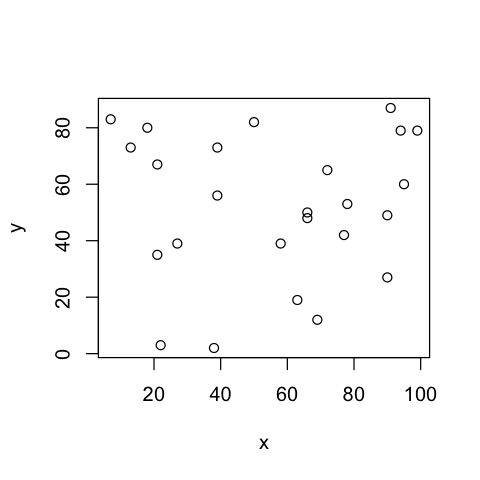

In [2]:
set.seed(0)
x = round(runif(n=25, min=1, max=100))
y = round(runif(n=25, min=1, max=100))
m = cbind(x, y)
plot(m)

Splitting the points into 4. It doesn't really matter what clustering algorithm we use.

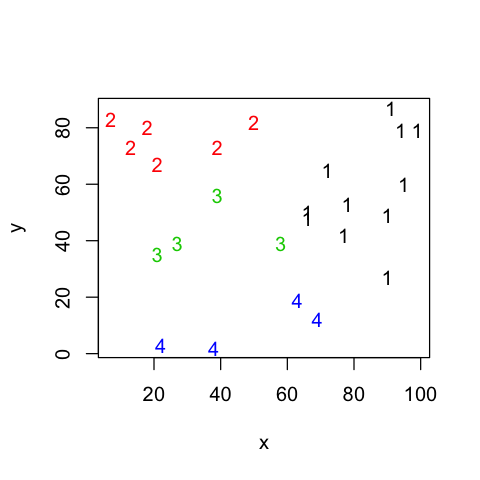

In [3]:
K = 4
k = kmeans(m, K)$cluster
clusters = lapply(split(m,k), matrix, ncol=2)

# Plot the points and distinguish the clusters
plot(m, pch='')
for(i in 1:K) {
    points(clusters[[i]], pch=toString(i), col=i)
}

Calculate the covariance matrix of cluster_1

In [11]:
x1 = clusters[[1]][,1]
x2 = clusters[[1]][,2]
x1_average = mean(x1)
x2_average = mean(x2)
x1_variance = sum((x1-x1_average)^2)/length(x1-1)
x2_variance = sum((x2-x2_average)^2)/length(x2-1)
x12_covariance = sum((x1-x1_average)*(x2-x2_average))/length(x1-1)
covariance_matrix = cov(clusters[[1]])

covariance_matrix
matrix(c(x1_variance, x12_covariance, x12_covariance, x2_variance), ncol=2)

144.07273,89.25455
89.25455,326.29091


130.9752,81.1405
81.1405,296.6281


Why do we have a _slightly_ different covariance matrix when calculating manually compared to `cov` function provided by R?

We are going to use the matrix produced by cov()

### Calculating mahalanobis distance

In [30]:
random_point = matrix(c(50,50), ncol=2)

inverse_covariance_matrix = solve(covariance_matrix)
centroid = matrix(c(x1_average, x2_average), ncol=2)

d2 = (random_point-centroid) %*% inverse_covariance_matrix %*% t(random_point-centroid)
d2

8.357397


Verifying answer

In [29]:
mahalanobis(random_point, centroid, covariance_matrix)

[1] 8.357397

Euclidean Distance

In [32]:
sqrt(sum((random_point-centroid)^2))

[1] 34.41903

### Comparing mahalanobis distance and l2 norm for all 4 clusters with point(50,50)

Pink stands for l2 norm, and grey stands for mahalanobis distance

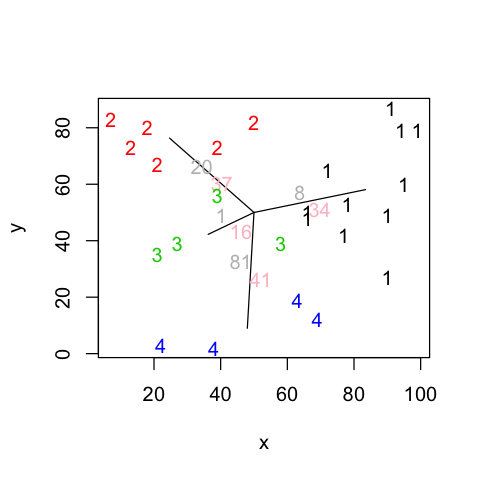

In [54]:
plot(m, pch='')
for (i in 1:K) {
    points(clusters[[i]], pch=toString(i), col=i)
    cluster = clusters[[i]]
    centroid = colMeans(cluster)
    cov = cov(cluster)
    d2 = mahalanobis(random_point, centroid, cov)
    segments(random_point[1], random_point[2], centroid[1], centroid[2])
    
    l2d = sqrt(sum((random_point-centroid)^2))
    
    # labeling things
    label_point = colMeans(rbind(random_point, centroid))
    offset = 3
    text(label_point[1]-offset, label_point[2]+offset, toString(round(d2)), col="grey")
    text(label_point[1]+offset, label_point[2]-offset, toString(round(l2d)), col="pink")
}

### Conclusion

As seen from the plot above, C1 has a much large volume, therefore, although its L2 norm from p(50,50) is less than C4 and C2, its mahalanobis distance is smaller.